In [1]:
import spock
import random
import numpy as np
import rebound
import pandas as pd
from spock import simsetup
from spock import FeatureClassifier
import matplotlib.pyplot as plt

In [2]:
datapath = '../../cleanData/csvs/resonant/'
data = pd.read_csv(datapath+'resTestTheta.csv')

In [3]:
data.columns

Index(['Unnamed: 0.1', 'EMcrossnear', 'EMfracstdnear', 'EPstdnear',
       'MMRstrengthnear', 'EMcrossfar', 'EMfracstdfar', 'EPstdfar',
       'MMRstrengthfar', 'threeBRfillfac', 'threeBRfillstd', 'MEGNO',
       'MEGNOstd', 'ThetaSTD12', 'ThetaSTD23', 'Tsec', 'InitialStable',
       'Unnamed: 0', 'runstring', 'instability_time',
       'shadow_instability_time', 'Stable'],
      dtype='object')

In [50]:
def plotfill(x):
    p1 = np.log10((x**(-1.5))*(1/(1-(x**(-1)))))
    p2 = np.sqrt(-np.log(1-(x**(-1))))
    return p1+p2
fillList =np.linspace(1.0001,20,100000)
y = list(map(plotfill,fillList))
y = list(map(lambda x: 10**((x)+5.5), y))


In [6]:
import matplotlib as mpl

In [7]:
data.describe()

,Unnamed: 0.1,EMcrossnear,EMfracstdnear,EPstdnear,MMRstrengthnear,EMcrossfar,EMfracstdfar,EPstdfar,MMRstrengthfar,threeBRfillfac,threeBRfillstd,MEGNO,MEGNOstd,ThetaSTD12,ThetaSTD23,Tsec,InitialStable,Unnamed: 0,instability_time,shadow_instability_time
count,102497.000000,102497.000000,95951.000000,95951.000000,94867.000000,102497.000000,95951.000000,95951.000000,77274.000000,9.595100e+04,9.595100e+04,95951.000000,95951.000000,102497.000000,102497.000000,102497.000000,102497.000000,102497.000000,1.024970e+05,1.024970e+05
mean,51248.000000,0.144542,0.076233,0.004712,0.654740,0.358875,0.036325,0.004954,0.254964,3.431024e+03,1.417135e+04,27.440420,6.799008,1.376453,1.401907,19735.493103,0.936135,51248.000000,2.602292e+08,2.679298e+08
std,29588.479608,0.103741,0.100980,0.009005,1.716331,0.200712,0.040325,0.007801,1.140790,1.030956e+06,4.112919e+06,76.894153,20.049037,0.636750,0.622153,22710.122815,0.244514,29588.479608,4.221284e+08,4.285158e+08
min,0.000000,0.012845,0.000715,0.000002,0.000266,0.020136,0.000105,0.000001,0.000089,5.609814e-03,1.052258e-06,-314.442737,0.000001,0.004862,0.000927,608.030128,0.000000,0.000000,1.000287e+04,0.000000e+00
25%,25624.000000,0.072808,0.024225,0.000362,0.059421,0.199495,0.009326,0.000596,0.012955,1.856464e-01,9.116843e-04,1.998406,0.009299,0.885669,0.990731,5306.966101,1.000000,25624.000000,8.373884e+04,7.563998e+04
50%,51248.000000,0.117834,0.044674,0.001315,0.155531,0.315298,0.022727,0.001983,0.033351,4.951575e-01,5.548346e-03,2.377402,0.199432,1.720601,1.732783,11471.208706,1.000000,51248.000000,1.390492e+06,1.410175e+06
75%,76872.000000,0.182629,0.087319,0.004939,0.564356,0.484311,0.048556,0.005883,0.105275,1.279340e+00,3.174545e-02,16.863936,4.072095,1.823643,1.826051,25319.523778,1.000000,76872.000000,4.969742e+08,7.897363e+08
max,102496.000000,0.982453,7.790978,0.188420,64.907315,1.194679,0.600259,0.188758,60.421515,3.192080e+08,1.271032e+09,2397.757540,668.779693,2.939410,2.989579,241280.324228,1.000000,102496.000000,1.000000e+09,1.000000e+09


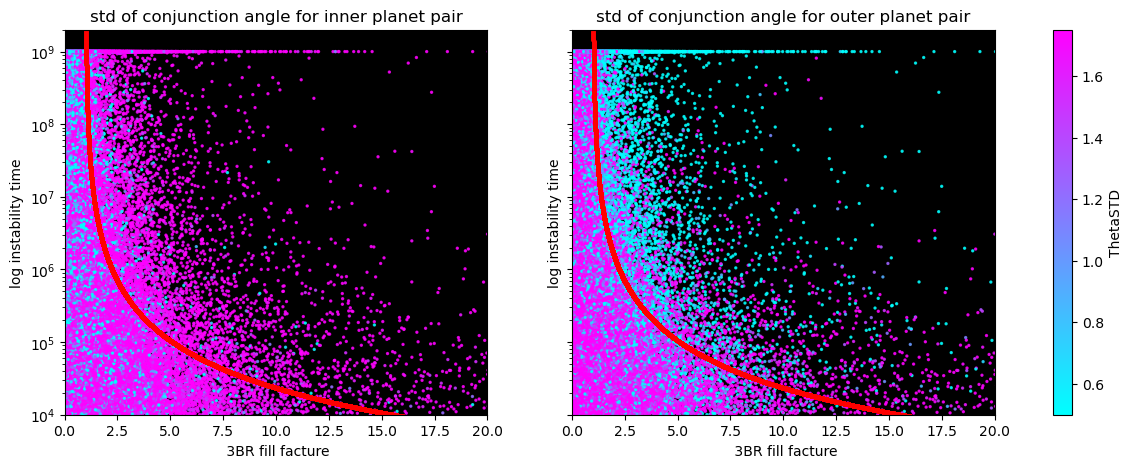

In [51]:
#ax = plt.axes()
fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
vmi = 0.5
vma = 1.75
tag1 = 'ThetaSTD12'
tag2 = 'ThetaSTD23'
ax[0].scatter((data['threeBRfillfac']),(data['instability_time']), 
           s=2, c=((data[tag1])), cmap="cool",
           vmin=vmi,vmax=vma,alpha=.8)
fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(vmi, vma), cmap='cool'),
             ax=ax, orientation='vertical', label='ThetaSTD')

# cbar = fig.colorbar(orientation="vertical", extend="both",
#                     pad=0.05, shrink=1, aspect=20, format="%.3f")

ax[0].scatter(fillList, y,s=4, c = 'red')
ax[0].set_xlim([0,20])
ax[0].set_ylim([1e4,2e9])
ax[0].set_xlabel(" 3BR fill facture")
ax[0].set_ylabel("log instability time")
ax[0].set_yscale('log')
#cbar.set_label('close body conjunction angle std')
ax[0].set_facecolor("black")
ax[0].set_title('std of conjunction angle for inner planet pair')


ax[1].scatter((data['threeBRfillfac']),(data['instability_time']), 
           s=2, c=((data[tag2])), cmap="cool",
           vmin=vmi,vmax=vma,alpha=.8)

ax[1].scatter(fillList, y,s=4, c = 'red')
ax[1].set_xlim([0,20])
ax[1].set_xlabel(" 3BR fill facture")
ax[1].set_ylabel("log instability time")
ax[1].set_title('std of conjunction angle for outer planet pair')

#cbar.set_label('close body conjunction angle std')
ax[1].set_facecolor("black")

/home/ethadhani/summerSPOCK/datafilt/graphThetaSTD.ipynb

In [9]:
specific = data[(data['threeBRfillfac'] > 15) & (data['instability_time']>9e8)]

In [12]:
specific['Unnamed: 0.1']

27216    27216
37919    37919
43946    43946
54691    54691
64067    64067
65167    65167
96975    96975
Name: Unnamed: 0.1, dtype: int64


In [ ]:
27216
37919
43946
54691
64067
65167
96975